In [1]:
import numpy as np


def compute_prediction(X, weights):
    """
    Compute the prediction y_hat based on current weights
    """
    predictions = np.dot(X, weights)
    return predictions

In [2]:
def update_weights_gd(X_train, y_train, weights, learning_rate):
    """
    Update weights by one step and return updated wights
    """
    predictions = compute_prediction(X_train, weights)
    weights_delta = np.dot(X_train.T, y_train - predictions)
    m = y_train.shape[0]
    weights += learning_rate / float(m) * weights_delta
    return weights



In [3]:

def compute_cost(X, y, weights):
    """
    Compute the cost J(w)
    """
    predictions = compute_prediction(X, weights)
    cost = np.mean((predictions - y) ** 2 / 2.0)
    return cost

In [4]:

def train_linear_regression(X_train, y_train, max_iter, learning_rate, fit_intercept=False):
    """
    Train a linear regression model with gradient descent, and return trained model
    """
    if fit_intercept:
        intercept = np.ones((X_train.shape[0], 1))
        X_train = np.hstack((intercept, X_train))
    weights = np.zeros(X_train.shape[1])
    for iteration in range(max_iter):
        weights = update_weights_gd(X_train, y_train, weights, learning_rate)
        # Check the cost for every 100 (for example) iterations
        if iteration % 100 == 0:
            print(compute_cost(X_train, y_train, weights))
    return weights


In [5]:

def predict(X, weights):
    if X.shape[1] == weights.shape[0] - 1:
        intercept = np.ones((X.shape[0], 1))
        X = np.hstack((intercept, X))
    return compute_prediction(X, weights)


In [6]:
# A small example
X_train = np.array([[6], [2], [3], [4], [1], [5], [2], [6], [4], [7]])

y_train = np.array([5.5, 1.6, 2.2, 3.7, 0.8, 5.2, 1.5, 5.3, 4.4, 6.8])

weights = train_linear_regression(X_train, y_train, max_iter=100, learning_rate=0.01, fit_intercept=True)

X_test = np.array([[1.3], [3.5], [5.2], [2.8]])

predictions = predict(X_test, weights)


5.571972628


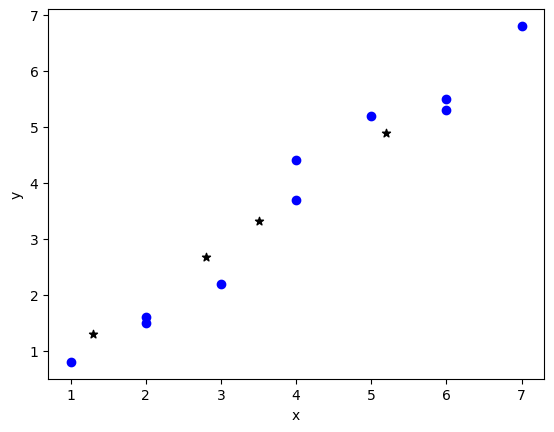

In [7]:

import matplotlib.pyplot as plt
plt.scatter(X_train[:, 0], y_train, marker='o', c='b')
plt.scatter(X_test[:, 0], predictions, marker='*', c='k')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [8]:

# The diabetes example
from sklearn import datasets
diabetes = datasets.load_diabetes()
print(diabetes.data.shape)

num_test = 30
X_train = diabetes.data[:-num_test, :]
y_train = diabetes.target[:-num_test]


(442, 10)


In [9]:

weights = train_linear_regression(X_train, y_train, max_iter=5000, learning_rate=1, fit_intercept=True)

X_test = diabetes.data[-num_test:, :]
y_test = diabetes.target[-num_test:]

predictions = predict(X_test, weights)

print(predictions)
print(y_test)


2960.123025607216
1984.7486632548823
1729.7769635921995
1627.6348119343263
1572.7632730523533
1539.554802043756
1518.6181097259152
1505.1916919461312
1496.4882691586809
1490.7927148484966
1487.0293572901583
1484.516650020924
1482.8194344074193
1481.6579404201677
1480.85109510679
1480.280921685538
1479.8700312138085
1479.5673033510566
1479.3387231207394
1479.1614836837496
1479.0201696937395
1478.9042732451073
1478.8065678119995
1478.7220374658161
1478.6471673310045
1478.57947029736
1478.5171691036435
1478.4589811941237
1478.4039719757411
1478.3514538988786
1478.3009164521106
1478.251977168085
1478.204347022648
1478.157805775425
1478.1121842360594
1478.0673513977845
1478.0232050223478
1477.9796646941397
1477.9366666564356
1477.8941599449035
1477.8521034731898
1477.8104638227055
1477.7692135570753
1477.728329930129
1477.6877938909208
1477.6475893142133
1477.6077024029764
1477.5681212227464
1477.5288353374858
1477.4898355238697
[232.22192119 123.87532386 166.12297497 170.23855082 228.12523

In [10]:

# Directly use SGDRegressor from scikit-learn
from sklearn.linear_model import SGDRegressor
regressor = SGDRegressor(loss='squared_error', penalty='l2', alpha=0.0001, learning_rate='constant', eta0=0.01,
                         max_iter=1000)
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)
print(predictions)


[215.78291047 121.98330825 181.10468305 167.13388657 206.8169877
 143.28834804 115.27616429  89.98816168 151.45274581 191.55163338
 186.78313113 160.42838285 168.65115469  92.13802761 177.75829557
 131.7964705  249.66656536 104.79559812 122.91820231 124.94096061
 209.82516828  75.69816723 135.77813468 120.26298248  58.97294383
 183.59139167 128.69708467 134.51522429 187.13827481  64.3409108 ]


In [11]:

from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_depth=10, min_samples_split=3)

regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)
print(predictions)
print(y_test)

[274.          64.85714286 139.          96.6        120.
 141.66666667 241.5         59.         127.         238.
 252.         124.         146.5         37.         190.
 209.         226.5         64.85714286  98.5         63.5
 133.28571429  64.85714286  64.85714286  55.4         74.5
 281.         241.5         94.          77.         241.5       ]
[261. 113. 131. 174. 257.  55.  84.  42. 146. 212. 233.  91. 111. 152.
 120.  67. 310.  94. 183.  66. 173.  72.  49.  64.  48. 178. 104. 132.
 220.  57.]


In [12]:

from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=3)
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)
print(predictions)

[243.35987119  89.65195531 168.70348076 160.57668816 179.75929167
 145.78236958 122.10935349 102.45367435 112.39103811 196.79675752
 196.34439697 160.11945788 190.72026995  97.05674857 192.83388853
 126.3699479  266.68078571  92.89227597 111.72119153 119.38007458
 247.8854932   71.32267131  92.24011731  95.77400313  74.26186127
 234.69832645 118.67999856  87.28187917 179.87539686 125.27863208]


In [13]:

from sklearn.svm import SVR
regressor = SVR(C=0.1, epsilon=0.02, kernel='linear')

regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)
print(predictions)

[141.6583512  141.35033626 141.70833018 141.55293297 141.60667365
 141.39073618 141.42099951 141.22242067 141.50841745 141.67052914
 141.6057513  141.60230289 141.54915902 141.15926787 141.66418259
 141.36563527 141.82103466 141.32977581 141.41983518 141.38218321
 141.6783659  141.23748526 141.40698249 141.35658585 141.11971192
 141.58574285 141.49639889 141.43349679 141.55933576 141.21664947]


In [14]:

from sklearn import datasets
diabetes = datasets.load_diabetes()
num_test = 30    # the last 30 samples as testing set
X_train = diabetes.data[:-num_test, :]
y_train = diabetes.target[:-num_test]
X_test = diabetes.data[-num_test:, :]
y_test = diabetes.target[-num_test:]
param_grid = {
    "alpha": [1e-07, 1e-06, 1e-05],
    "penalty": [None, "l2"],
    "eta0": [0.03, 0.05, 0.1],
    "max_iter": [500, 1000]
}

In [15]:

from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV
regressor = SGDRegressor(loss='squared_error',
                         learning_rate='constant',
                         random_state=42)
grid_search = GridSearchCV(regressor, param_grid, cv=3)

In [16]:
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

{'alpha': 1e-07, 'eta0': 0.05, 'max_iter': 500, 'penalty': None}


In [17]:

regressor_best = grid_search.best_estimator_


predictions = regressor_best.predict(X_test)


In [18]:

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print(mean_squared_error(y_test, predictions))

print(mean_absolute_error(y_test, predictions))

print(r2_score(y_test, predictions))

1933.375567511739
35.48302167833626
0.6247482987860085
